# Multimode Interferometers (MMIs)

MMIs are devices that are used to combine and split light in a predictable way. They are designed not only to output a certain fraction of the input power, but are also designed so that the outputs have a certain phase difference. The basic design of an MMI includes the multimode region (a.k.a the body of the MMI) and tapers that gradually widen the input and output waveguides as they go into this region. The multimode region can be thought of as a wide waveguide that supports many guided moded. MMIs are denoted by the number of input and output ports they have (# of input ports) x (# output ports). So, a 2x2 MMI will have two input and two output ports.

**Insert gdsfactory image of mmi -- 1x2, 2x2**

<div style="text-align: center;">

![]()

</div>

### Self-Imaging

MMIs work on the principle of self-imaging. An "image" occurs when the electric fields at some distance in the MMI match the fields at the input. A wave is excited in one of the input ports and as light enters the multimode region, it scatters and interferes with itself as it reflects off of the walls of the MMI. As it either interferes constructively and destructively, a field pattern is created. At a certain length, these images are replicas of the input.

* Need pictures
* How to determine the length of the MMI body

In [1]:
# Some sort of MMI simulation so can see self-imaging?
import meep as mp
import gdsfactory as gf
from gdsfactory.simulation.gmeep import get_simulation
from gdsfactory.simulation.gmeep.get_simulation import get_meep_geometry_from_component

# Define materials
Si = mp.Medium(index=3.45)
SiO2 = mp.Medium(index=1.45)

# Define wavelength in um
wvl = 1.55

# # Define cell and geometric parameters
resolution = 20
dpml = 1
pad = 1
mmi = gf.components.mmi2x2()

Sx = dpml + -(mmi.ports["o1"].x) + (mmi.ports["o4"].x) + dpml
Sy = dpml + pad + -(mmi.ports["o1"].y) + -(mmi.ports["o4"].y) + pad + dpml
cell_size = mp.Vector3(Sx,Sy)

# Extend the ports to match the length of the cell
mmi = gf.components.extend_ports(mmi, port_names=["o1","o2","o3","o4"], length=1)

# Add PML (perfectly matched layers)
pml = [mp.PML(dpml)]

# Using the gdsfactory function, get the mmi geometry
geometry = get_meep_geometry_from_component(mmi)

# Put a pulse Eigenmode source at beginning of one waveguide
fcen = 1 / wvl
width = 0.1
fwidth = width * fcen
src=mp.GaussianSource(frequency=fcen, fwidth=fwidth)
source = [mp.EigenModeSource(src=src, eig_band=1,
        eig_kpoint = (1,0),
        size=mp.Vector3(0,1),
        center=mp.Vector3(-mmi.ports["o1"].x+dpml+1, -mmi.ports["o1"].y/2))
        ]

# Simulation dictionary
sim = get_simulation(mmi)

print(sim)

# Create simulation object
sim = mp.Simulation(resolution=resolution,
        geometry=geometry,
        geometry_center=mp.Vector3(2.75,0),
        cell_size=cell_size,
        sources=[source],
        boundary_layers=[mp.PML(dpml)]
)

# Show simulation set-up
sim.plot2D()

Using MPI version 4.0, 1 processes


2023-03-14 13:42:33.552 | INFO     | gdsfactory.config:<module>:50 - Load '/home/ebang4/miniconda3/envs/pmp/lib/python3.11/site-packages/gdsfactory' 6.27.0
2023-03-14 13:42:34.918 | INFO     | gdsfactory.technology.layer_views:__init__:779 - Importing LayerViews from KLayout layer properties file: /home/ebang4/miniconda3/envs/pmp/lib/python3.11/site-packages/gdsfactory/generic_tech/klayout/tech/layers.lyp.
/home/ebang4/miniconda3/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ebang4/miniconda3/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/ebang4/miniconda3/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the 

[13:42:39] INFO: Using client version: 1.9.3                                                              ]8;id=164895;file:///home/ebang4/miniconda3/envs/pmp/lib/python3.11/site-packages/tidy3d/log.py\log.py]8;;\:]8;id=729567;file:///home/ebang4/miniconda3/envs/pmp/lib/python3.11/site-packages/tidy3d/log.py#57\57]8;;\

ImportError: cannot import name 'WebError' from 'tidy3d.log' (/home/ebang4/miniconda3/envs/pmp/lib/python3.11/site-packages/tidy3d/log.py)

In [84]:
sim.run(mp.at_beginning(mp.output_epsilon),
        mp.to_appended("ez", mp.at_every(2, mp.output_efield_z)),
        until=200)

RuntimeError: meep: Source width > cell width in y direction!


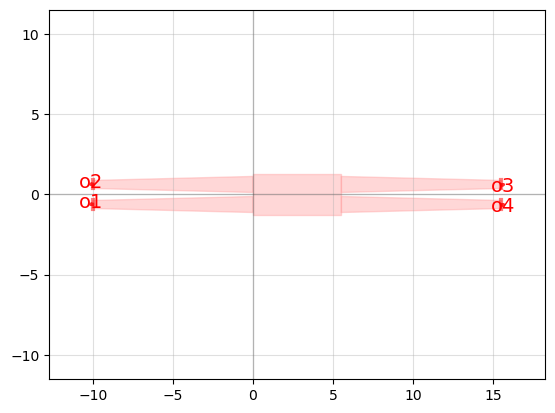

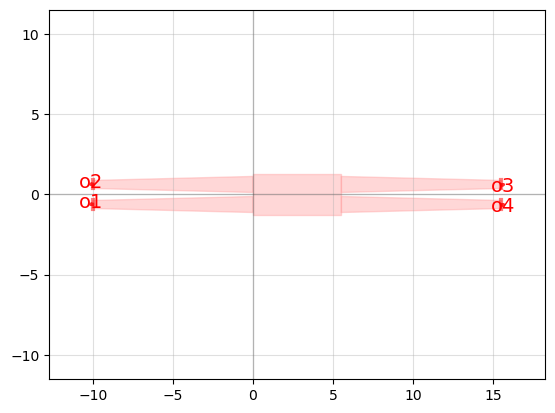

In [24]:
import gdsfactory as gf
gf.components.mmi2x2().plot()

### MMI Applications

### Sources